<a href="https://colab.research.google.com/github/tmwiceu/DADS5001-Mini-Project/blob/main/DADS5001_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import sys
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [35]:
df_marriage = pd.read_csv("https://raw.githubusercontent.com/tmwiceu/DADS5001-Mini-Project/main/marriage_data_india.csv")
df_marriage.head()

,ID,Marriage_Type,Age_at_Marriage,Gender,Education_Level,Caste_Match,Religion,Parental_Approval,Urban_Rural,Dowry_Exchanged,Marital_Satisfaction,Divorce_Status,Children_Count,Income_Level,Years_Since_Marriage,Spouse_Working,Inter-Caste,Inter-Religion
0,1,Love,23,Male,Graduate,Different,Hindu,No,Urban,No,Medium,Yes,5,Middle,34,No,No,No
1,2,Love,28,Female,School,Same,Hindu,Yes,Rural,Yes,Low,No,3,Middle,42,No,No,Yes
2,3,Arranged,39,Male,Postgraduate,Same,Muslim,Yes,Rural,No,Medium,No,0,High,25,No,No,No
3,4,Arranged,26,Female,School,Different,Hindu,Yes,Urban,Yes,Low,No,0,High,12,No,Yes,No
4,5,Love,32,Female,Graduate,Same,Hindu,Partial,Rural,Yes,Medium,No,1,Middle,41,No,No,Yes


## **เปรียบเทียบจำนวนคนที่แต่งงานโดยการคลุมถุงชน และรักกันจริง ๆ**

In [36]:
df_marriage['Marriage_Type'].value_counts()

,count
Marriage_Type,
Arranged,6022
Love,3978


## **จะเห็นว่าจำนวนคนที่แต่งงานโดยการคลุมถุงชนจะมีอัตราส่วนมากกว่าคนที่รักกันจริง**

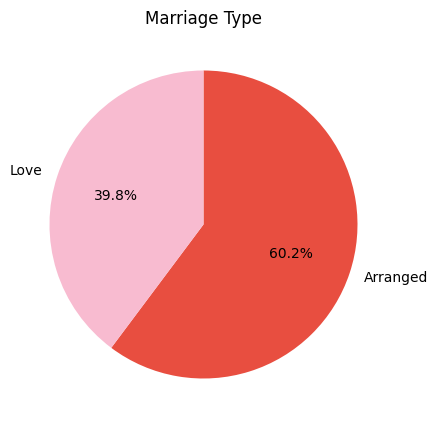

In [37]:
counts = df_marriage['Marriage_Type'].value_counts()
plt.figure(figsize=(5,5))
colors = ['#e84e40','#f8bbd0']
counts.plot.pie(autopct='%1.1f%%', startangle=90, counterclock=False, colors=colors)
plt.title('Marriage Type')
plt.ylabel('')
plt.show()

## **ต่อมาจะดูว่าช่วงอายุของการคลุมถุงชนและรักกันจริง ๆ เป็นอย่างไร**

In [38]:
filtered_df = df_marriage[df_marriage['Marriage_Type'] == 'Love'].copy()
filtered_df['Love'] = filtered_df['Marriage_Type'].astype(str) + ' ' + filtered_df['Age_at_Marriage'].astype(str)
print(filtered_df['Love'])

0       Love 23
1       Love 28
4       Love 32
5       Love 37
11      Love 31
         ...   
9989    Love 38
9990    Love 23
9992    Love 18
9995    Love 25
9997    Love 22
Name: Love, Length: 3978, dtype: object


In [39]:
filtered_df = df_marriage[df_marriage['Marriage_Type'] == 'Arranged'].copy()
filtered_df['Arranged'] = filtered_df['Marriage_Type'].astype(str) + ' ' + filtered_df['Age_at_Marriage'].astype(str)
print(filtered_df['Arranged'])

2       Arranged 39
3       Arranged 26
6       Arranged 24
7       Arranged 18
8       Arranged 22
           ...     
9993    Arranged 24
9994    Arranged 20
9996    Arranged 31
9998    Arranged 39
9999    Arranged 36
Name: Arranged, Length: 6022, dtype: object


## **จะเห็นว่าจำนวนคนแต่งงานแบบรักกันจริง ช่วงอายุที่แต่งงานมากที่สุดจะอยู่ในช่วง 25 - 30 ปี**

In [40]:
ages_love = df_marriage[df_marriage['Marriage_Type'] == 'Love']['Age_at_Marriage'].copy()
bins = [15, 20, 25, 30, 35, 40]
groups = pd.cut(ages_love, bins=bins, right=False)
counts = groups.value_counts().sort_index()
print(counts)

Age_at_Marriage
[15, 20)    360
[20, 25)    849
[25, 30)    966
[30, 35)    916
[35, 40)    887
Name: count, dtype: int64


# **ในทางกลับกัน จำนวนคนแต่งงานโดยการคลุมถุงชนที่มากที่สุดจะอยู่ในช่วงอายุ 30 - 35 ปี**

In [41]:
ages_Arranged = df_marriage[df_marriage['Marriage_Type'] == 'Arranged']['Age_at_Marriage'].copy()
bins = [15, 20, 25, 30, 35, 40]
groups = pd.cut(ages_Arranged, bins=bins, right=False)
counts = groups.value_counts().sort_index()
print(counts)

Age_at_Marriage
[15, 20)     532
[20, 25)    1375
[25, 30)    1377
[30, 35)    1403
[35, 40)    1335
Name: count, dtype: int64


## **พอลองนำข้อมูลทั้งสองมาเปรียบเทียบตามช่วงอายุจะได้แผนภาพตามด้านล่าง**

<Figure size 800x500 with 0 Axes>

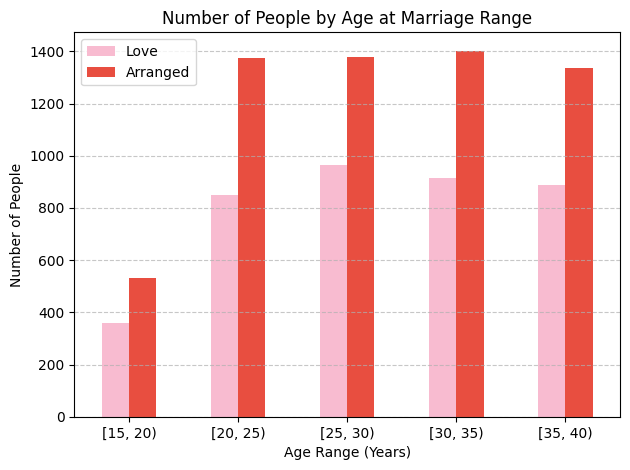

In [42]:
ages_love = df_marriage[df_marriage['Marriage_Type'] == 'Love']['Age_at_Marriage'].copy()
bins = [15, 20, 25, 30, 35, 40]
groups_love = pd.cut(ages_love, bins=bins, right=False)
counts_love = groups_love.value_counts().sort_index()

ages_arranged = df_marriage[df_marriage['Marriage_Type'] == 'Arranged']['Age_at_Marriage'].copy()
groups_arranged = pd.cut(ages_arranged, bins=bins, right=False)
counts_arranged = groups_arranged.value_counts().sort_index()

combined_counts = pd.DataFrame({
    'Love': counts_love,
    'Arranged': counts_arranged
})

plt.figure(figsize=(8,5))
combined_counts.plot(kind='bar', color=['#f8bbd0', '#e84e40'])

plt.title('Number of People by Age at Marriage Range')
plt.xlabel('Age Range (Years)')
plt.ylabel('Number of People')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## **ความพึงพอใจในการแต่งงาน**

In [43]:
filtered_df = df_marriage[df_marriage['Marriage_Type'] == 'Love'].copy()
filtered_df['Love'] = filtered_df['Marriage_Type'].astype(str) + ' ' + filtered_df['Marital_Satisfaction'].astype(str)
gender_counts = filtered_df['Marital_Satisfaction'].value_counts()
print(gender_counts)

Marital_Satisfaction
Medium    1987
High      1182
Low        809
Name: count, dtype: int64


In [44]:
filtered_df = df_marriage[df_marriage['Marriage_Type'] == 'Arranged'].copy()
filtered_df['Arranged'] = filtered_df['Marriage_Type'].astype(str) + ' ' + filtered_df['Marital_Satisfaction'].astype(str)
gender_counts = filtered_df['Marital_Satisfaction'].value_counts()
print(gender_counts)

Marital_Satisfaction
Medium    3014
High      1811
Low       1197
Name: count, dtype: int64


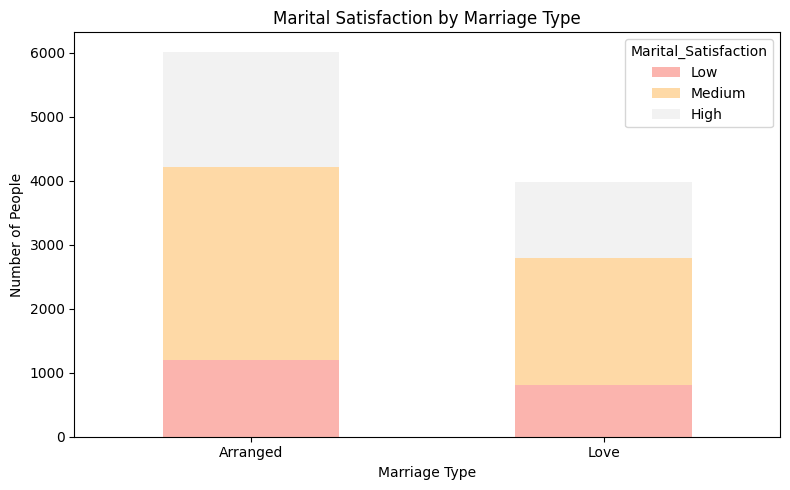

In [45]:
satisfaction = df_marriage.groupby('Marriage_Type')['Marital_Satisfaction'].value_counts().unstack()
satisfaction = satisfaction[['Low', 'Medium', 'High']]
satisfaction.plot(
    kind='bar',
    figsize=(8, 5),
    stacked=True,
    colormap='Pastel1'
)

plt.title('Marital Satisfaction by Marriage Type')
plt.xlabel('Marriage Type')
plt.ylabel('Number of People')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## **ต่อมาจะมาดูว่าคนที่แต่งงาน ทั้งคลุมถุงชน และรักกันจริง ๆ ระดับการศึกษาของพวกเขาเป็นอย่างไร**

In [46]:
df_marriage['Education_Level'].value_counts()

,count
Education_Level,
Graduate,3943
School,3073
Postgraduate,2018
PhD,966


## **โดยส่วนใหญ่แล้ว การแต่งงานทั้งสองประเภทก็จะอยู่ในช่วง Graduate**

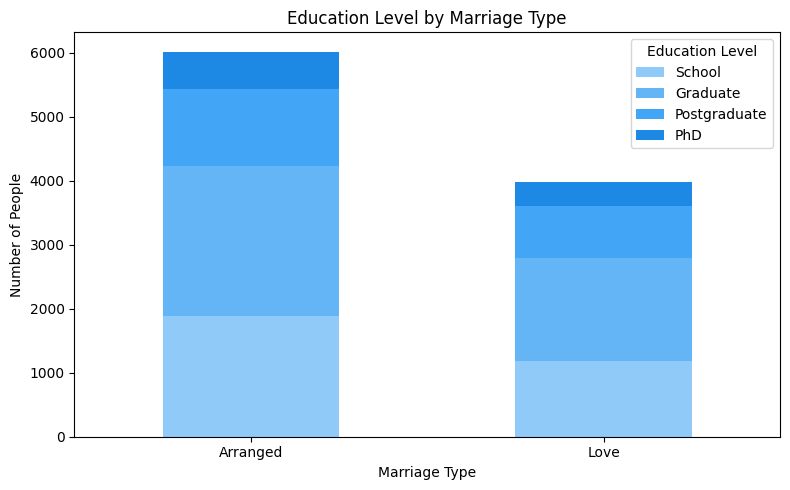

In [47]:
edu_order = ['School', 'Graduate', 'Postgraduate', 'PhD']
edu_by_marriage = df_marriage.groupby('Marriage_Type')['Education_Level'].value_counts().unstack()
edu_by_marriage = edu_by_marriage[edu_order]
colors = ['#90caf9', '#64b5f6', '#42a5f5', '#1e88e5']

edu_by_marriage.plot(kind='bar', stacked=True, figsize=(8, 5), color=colors)

plt.title('Education Level by Marriage Type')
plt.ylabel('Number of People')
plt.xlabel('Marriage Type')
plt.xticks(rotation=0)
plt.legend(title='Education Level')
plt.tight_layout()
plt.show()


## **สัดส่วนของชายหญิงที่แต่งงานโดยรักกันจริง**

In [48]:
filtered_df = df_marriage[df_marriage['Marriage_Type'] == 'Love'].copy()
filtered_df['Love'] = filtered_df['Marriage_Type'].astype(str) + ' ' + filtered_df['Gender'].astype(str)
gender_counts = filtered_df['Gender'].value_counts()
print(gender_counts)

Gender
Female    2048
Male      1930
Name: count, dtype: int64


## **สัดส่วนชายหญิงที่แต่งงานโดยคลุมถุงชน**

In [49]:
filtered_df = df_marriage[df_marriage['Marriage_Type'] == 'Arranged'].copy()
filtered_df['Arranged'] = filtered_df['Marriage_Type'].astype(str) + ' ' + filtered_df['Gender'].astype(str)
gender_counts = filtered_df['Gender'].value_counts()
print(gender_counts)

Gender
Female    3061
Male      2961
Name: count, dtype: int64


## **ต่อมาเราจะมาดูว่าสัดส่วนของคนแต่งงานที่อยู่ในเมืองหรือชนบาทมีมากกว่ากัน**

In [50]:
df_marriage['Urban_Rural'].value_counts()

,count
Urban_Rural,
Urban,6046
Rural,3954


In [51]:
filtered_df = df_marriage[df_marriage['Marriage_Type'] == 'Love'].copy()
filtered_df['Love'] = filtered_df['Marriage_Type'].astype(str) + ' ' + filtered_df['Urban_Rural'].astype(str)
print(filtered_df['Love'])

0       Love Urban
1       Love Rural
4       Love Rural
5       Love Urban
11      Love Rural
           ...    
9989    Love Rural
9990    Love Urban
9992    Love Urban
9995    Love Urban
9997    Love Rural
Name: Love, Length: 3978, dtype: object


## **จะเห็นว่าในเมือง การแต่งงานแบบทั้งรักกันจริงและถูกคลุมถุงชนมากกว่าในชนบททั้งคู่**

In [52]:
filtered_df = df_marriage[df_marriage['Marriage_Type'] == 'Love'].copy()
filtered_df['Love'] = filtered_df['Marriage_Type'].astype(str) + ' ' + filtered_df['Urban_Rural'].astype(str)
Love_counts = filtered_df['Urban_Rural'].value_counts()
print(Love_counts)

Urban_Rural
Urban    2411
Rural    1567
Name: count, dtype: int64


In [53]:
filtered_df = df_marriage[df_marriage['Marriage_Type'] == 'Arranged'].copy()
filtered_df['Arranged'] = filtered_df['Marriage_Type'].astype(str) + ' ' + filtered_df['Urban_Rural'].astype(str)
Arranged_counts = filtered_df['Urban_Rural'].value_counts()
print(Arranged_counts)

Urban_Rural
Urban    3635
Rural    2387
Name: count, dtype: int64


## **ดูว่ามีการแต่งงานแบบข้ามวรรณะมากน้อยแค่ไหน**

In [54]:
counts = df_marriage['Caste_Match'].value_counts()
percentages = df_marriage['Caste_Match'].value_counts(normalize=True) * 100
summary = pd.DataFrame({
    'Count': counts,
    'Percentage (%)': percentages.round(2)
})
print(summary)


             Count  Percentage (%)
Caste_Match                       
Same          7071           70.71
Different     2929           29.29


In [55]:
filtered_df = df_marriage[df_marriage['Marriage_Type'] == 'Love'].copy()
filtered_df['Love'] = filtered_df['Marriage_Type'].astype(str) + ' ' + filtered_df['Divorce_Status'].astype(str)
print(filtered_df['Love'])

0       Love Yes
1        Love No
4        Love No
5        Love No
11       Love No
          ...   
9989     Love No
9990     Love No
9992     Love No
9995     Love No
9997     Love No
Name: Love, Length: 3978, dtype: object


## **ดูว่าคนที่แต่งงานโดยรักกันจริง ๆ มีอัตราการหย่าร้างเท่าไหร่**

In [56]:
filtered_df = df_marriage[df_marriage['Marriage_Type'] == 'Love'].copy()
divorce_counts = filtered_df['Divorce_Status'].value_counts()
divorce_percent = filtered_df['Divorce_Status'].value_counts(normalize=True) * 100
summary = pd.DataFrame({
    'Count': divorce_counts,
    'Percentage (%)': divorce_percent.round(2)
})

print(summary)


                Count  Percentage (%)
Divorce_Status                       
No               3576           89.89
Yes               402           10.11


## **จากข้อมูลข้างต้นจะเห็นว่า แม้ว่าจะรักกันจริง ก็มีอัตราการหย่าเหมือนกัน เราเลยจะมาดูว่า การแต่งงานของทั้งสองฝ่าย ทางครอบครัวเขาเห็นด้วยหรือไม่**

In [57]:
filtered_df = df_marriage[(df_marriage['Marriage_Type'] == 'Love') & (df_marriage['Divorce_Status'] == 'Yes')].copy()
parental_approval_counts = filtered_df['Parental_Approval'].value_counts()
print(parental_approval_counts)


Parental_Approval
Yes        295
Partial     68
No          39
Name: count, dtype: int64


## **ดูว่าคนที่แต่งงานโดยการคลุมถุงชนมีอัตราการหย่าร้างเท่าไหร่**

In [58]:
filtered_df = df_marriage[df_marriage['Marriage_Type'] == 'Arranged'].copy()
divorce_counts = filtered_df['Divorce_Status'].value_counts()
divorce_percent = filtered_df['Divorce_Status'].value_counts(normalize=True) * 100
summary = pd.DataFrame({
    'Count': divorce_counts,
    'Percentage (%)': divorce_percent.round(2)
})

print(summary)


                Count  Percentage (%)
Divorce_Status                       
No               5423           90.05
Yes               599            9.95


## **การแลกสินสอด**

In [59]:
counts = df_marriage['Dowry_Exchanged'].value_counts()
print(counts)

Dowry_Exchanged
No               6002
Yes              2996
Not Disclosed    1002
Name: count, dtype: int64
